# Midterm Review

The goals of this notebook are to review a few basic commands we should know how to use, and problems we might encounter.

## 0. Hyperbolicity

Maxwell's equations in E&M are given by

$$
\begin{align}
  \nabla \cdot \mathbf{E} &= \frac{\rho}{\varepsilon_0} \quad & \nabla \times \mathbf{E} &= -\frac{\partial\mathbf B}{\partial t}, \\
  \nabla \cdot \mathbf{B} &= 0 \quad & \nabla \times \mathbf{B} &= \mu_0\left( \mathbf{J} + \varepsilon_0 \frac{\partial\mathbf E}{\partial t}\right).
\end{align}
$$

Which equation(s) are elliptic, parabolic, or hyperbolic?

In absence of sources, we can take the curl of the equations with time-derivatives and
arrive with two independent equations for $\mathbf{E}$ and $\mathbf{B}$. (In fact, we could include
the source terms as well, but have dropped these for clarity.)
Are these equations elliptic, parabolic, or hyperbolic?

$$
\begin{align}
  \frac{1}{c^2} \frac{\partial^2 \mathbf{E}}{\partial t^2} - \nabla^2 \mathbf{E} = 0\,, \\
  \frac{1}{c^2} \frac{\partial^2 \mathbf{B}}{\partial t^2} - \nabla^2 \mathbf{B} = 0\,.
\end{align}
$$


## 1. Integration syntax

In [1]:
# For most integration problems, the quad() routine will be a good choice.
# This is contained in scipy.integrate.
import scipy.integrate as integ
import numpy as np

# Suppose we wish to integrate an exponential, e^(a*x), from 0 to 2.
def eax(x, a):
    return np.exp(a*x)

# Why isn't this working?
# What is a good way to fix this?
integ.quad(eax, 0, 2)

TypeError: eax() missing 1 required positional argument: 'a'

In [2]:
print("Using args:", integ.quad(eax, 0, 2, args=(1,)))
print("Using lambda:", integ.quad(lambda x: eax(x, 1), 0, 2))

Using args: (6.3890560989306495, 7.093277186654589e-14)
Using lambda: (6.3890560989306495, 7.093277186654589e-14)


## 2. Integration uncertainty

In [3]:
import scipy.integrate as integ
import numpy as np

# Again, suppose we wish to integrate an exponential, e^(a*x), from 0 to 2.
def eax(x, a):
    return np.exp(a*x)
# We will specify a = 1 this time.

# Quad returns two values: the integral, and an error estimate.
print("quad returns:", integ.quad(lambda x: eax(x, 1), 0, 2))

# Other methods do not return an error estimate, for example the romberg
# integration function. How do you know how accurate this result is?
print("romberg returns:", integ.romberg(lambda x: eax(x, 1), 0, 2))

quad returns: (6.3890560989306495, 7.093277186654589e-14)
romberg returns: 6.38905609893066


In [4]:
# One way is to vary the tolerance and make sure the answer
# doesn't change below the tolerance threshhold. 
print("tol = 1e-1 result:", integ.romberg(lambda x: eax(x, 1), 0, 2, tol=1.0e-1))
print("tol = 1e-3 result:", integ.romberg(lambda x: eax(x, 1), 0, 2, tol=1.0e-3))
print("tol = 1e-5 result:", integ.romberg(lambda x: eax(x, 1), 0, 2, tol=1.0e-5))
# These answers may be more accurate than the specified tolerance, but this is not guaranteed.
# Setting a tolerance is also not always guaranteed to return a result.

tol = 1e-1 result: 6.389242345494339
tol = 1e-3 result: 6.389056389097693
tol = 1e-5 result: 6.389056099045062


In [6]:
import scipy.special as sf
# For tricky integrals, setting the tolerance might be insufficient.
integ.romberg(lambda x: sf.jv(1, x)/x, 0, 1000, tol=1.0e-3)
# Even quad can get tripped up sometimes.
integ.quad(lambda x: sf.jv(0, x), 0, np.inf)
# For cases like this, special integration routines may be needed. Some
# applications do, however, handle this sort of thing natively, eg. Mathematica.

C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\James\Anaconda3\lib\site-packages\scipy\integrate\quadrature.py:752: AccuracyWarning: divmax (10) exceeded. Latest difference = nan
  AccuracyWarning)
C:\Users\James\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


(-21.15467472269453, 28.24657731357536)

## 3. ODE integration

In [ ]:
import scipy.integrate as integ
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Suppose we wish to integrate f''(x) - a*( 1 - f(x)^2 )*f'(x) + f(x) = 0,
# with a = 1. We will need to write this in a first-order form, and define
# a function to supply to solve_ivp,
def my_eom(t, y, a) :
    """
    y[0] = f
    y[1] = g
    """
    dydt = np.zeros_like(y)
    
    # Your code here...
    raise NotImplementedError
    
    return dydt

# We will also need to specify initial conditions.
y0 = [2., 0]
sol = integ.solve_ivp( lambda t, y: my_eom(t, y, 1), (0, 20), y0 )
plt.plot(sol.t, sol.y[0])

In [ ]:
# solution:
#     dydt[0] = y[1]
#     dydt[1] = a*(1.-y[0]**2)*y[1] - y[0]

## 4. Stiff ODEs

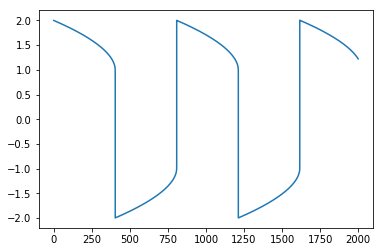

In [8]:
import scipy.integrate as integ
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# As above, we wish to integrate f''(x) - a*( 1 - f(x)^2 )*f'(x) + f(x) = 0,
# now with a = 500.
def my_eom(t, y, a) :
    """ y[0] = f, y[1] = g """
    dydt = np.zeros_like(y)
    dydt[0] = y[1]
    dydt[1] = a*(1.-y[0]**2)*y[1] - y[0]
    return dydt

# We will specify the same initial conditions.
y0 = [2., 0]
# The below command takes a long time to run.
# What is going on? How can we fix this?
sol = integ.solve_ivp( lambda t,y: my_eom(t, y, 500), (0, 2000), y0 )
plt.plot(sol.t, sol.y[0])

In [ ]:
# Speed this up by adding (e.g.):
# method="Radau"
# To the solve_ivp call.

## 5. PDE integration

As before, we can write Maxwell's equations in absence of source terms as

$$
\begin{align}
  \frac{1}{c^2} \frac{\partial^2 \mathbf{E}}{\partial t^2} - \nabla^2 \mathbf{E} = 0\,, \\
  \frac{1}{c^2} \frac{\partial^2 \mathbf{B}}{\partial t^2} - \nabla^2 \mathbf{B} = 0\,.
\end{align}
$$

Consider the following: 
1. How would you discretize these to solve them as an IVP?
2. Consider the code we used to solve the scalar wave equation in the PDE\_Integration notebook (below). What modifications would we need to make to solve the above equations?
3. So far, we have been looking at Eulerian integration. For ODEs, we looked at the midpoint method as well, $$ f(t+\Delta t) = f(t) + \Delta t A\left(t+\frac{\Delta t}{2}, f\left(t+\frac{\Delta t}{2}\right) \right) \,. $$ What modifications would we need to make to the code to implement this method?

```
def wave_step(f, g, dx, dt) :
    """
    Function to compute the solution to the 2-d wave
    equation at the next timestep using Euler's method,
    centered finite differencing, and Dirichlet
    boundary conditions.
    
    Accepts parameters:
    f: 2-d array containing function values
    g: 2-d array containing function values, time-derivative of f
    dx: spacing between points of f, assuming dx = dy
    dt: size of timestep
    """
    f_new = np.zeros_like(f)
    g_new = np.zeros_like(g)
    
    # 2-D Laplacian of f using array slicing, excluding boundaries
    # For an N x N array f, f_lap is the N-1 x N-1 array in the "middle"
    f_lap = (f[2:,1:-1] - 2*f[1:-1,1:-1] + f[:-2,1:-1]) / dx**2\
            + (f[1:-1,2:] - 2*f[1:-1,1:-1] + f[1:-1,:-2]) / dx**2
    
    # Alternative 2-D Laplacian of f, using a convolution operator.
    # ker = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]) / dx**2
    # f_lap = sig.convolve(f, ker, mode='valid')
    
    # Forward-Euler time step for all points except the boundaries
    g_new[1:-1,1:-1] = g[1:-1,1:-1] + dt*f_lap
    f_new = f + dt*g

    # Apply boundary conditions
    f_new[:,0] = 0
    f_new[:,-1] = 0
    f_new[0,:] = 0
    f_new[-1,:] = 0
    g_new[:,0] = 0
    g_new[:,-1] = 0
    g_new[0,:] = 0
    g_new[-1,:] = 0

    return f_new, g_new
```